In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
wine = pd.read_csv('./winequality-red.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Exploring Dataset

In [3]:
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We see that, there is big difference between Mean and 50% for column - 'Free Sulphur Dioxide' and 'Total Sulphur'. Means there is skewness.
Also, we see big difference between Max and 75% for columns except - 'Quality' and Alcohol, denoting outliers in the dataset

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no missing value. It's a great thing! Phew!

## Checking Outliers

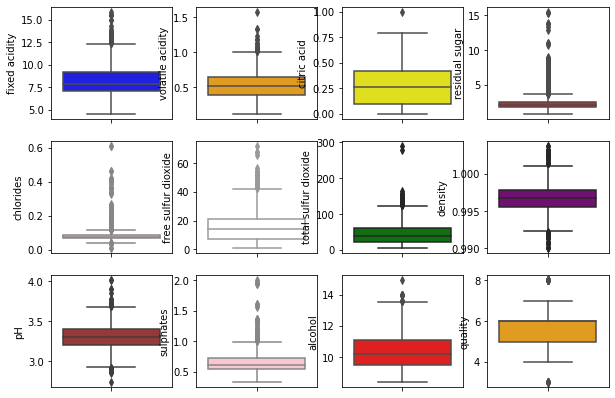

In [7]:
f, axes = plt.subplots(3, 4, figsize=(10, 7), sharex=True)

sns.boxplot('fixed acidity',data=wine,orient='v',ax=axes[0,0],color='Blue')

sns.boxplot('volatile acidity',data=wine,orient='v',ax=axes[0,1],color='orange')

sns.boxplot('citric acid',data=wine,orient='v',ax=axes[0,2],color='yellow')

sns.boxplot('residual sugar',data=wine,orient='v',ax=axes[0,3],color='red')

sns.boxplot('chlorides',data=wine,orient='v',ax=axes[1,0],color='pink')

sns.boxplot('free sulfur dioxide',data=wine,orient='v',ax=axes[1,1],color='white')

sns.boxplot('total sulfur dioxide',data=wine,orient='v',ax=axes[1,2],color='green')

sns.boxplot('density',data=wine,orient='v',ax=axes[1,3],color='purple')

sns.boxplot('pH',data=wine,orient='v',ax=axes[2,0],color='brown')

sns.boxplot('sulphates',data=wine,orient='v',ax=axes[2,1],color='pink')

sns.boxplot('alcohol',data=wine,orient='v',ax=axes[2,2],color='red')

sns.boxplot('quality',data=wine,orient='v',ax=axes[2,3],color='orange')

## Plotting graph for Correlation

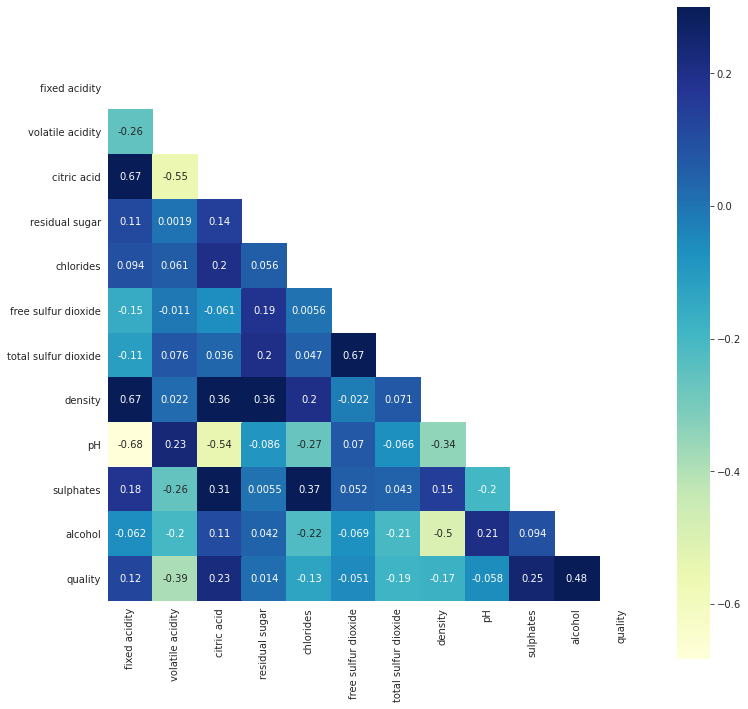

In [8]:
corr = wine.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(12, 12))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu",annot=True)

## Plotting Graphs to check Dependency of features on Quality

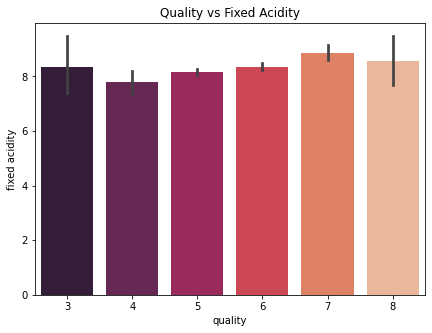

In [9]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Fixed Acidity")
sns.barplot(x='quality',y='fixed acidity',data=wine,palette='rocket')

On increasing FIXED ACIDITY, QUALITY INCREASE

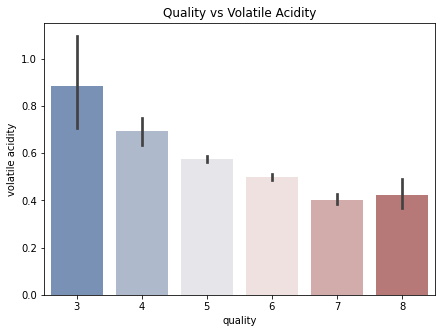

In [10]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Volatile Acidity")
sns.barplot(x='quality',y='volatile acidity',data=wine,palette='vlag')

On INCREASING VOLATILE ACIDITY, QUALITY DECREASES

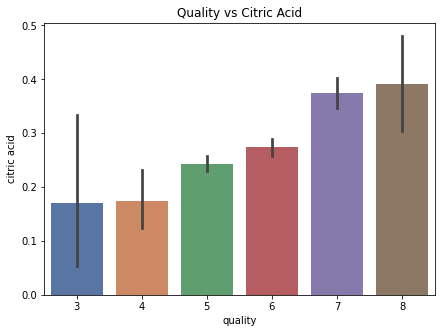

In [11]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Citric Acid")
sns.barplot(x='quality',y='citric acid',data=wine,palette='deep')

On INCREASING CITRIC ACID, QUALITY INCREASE

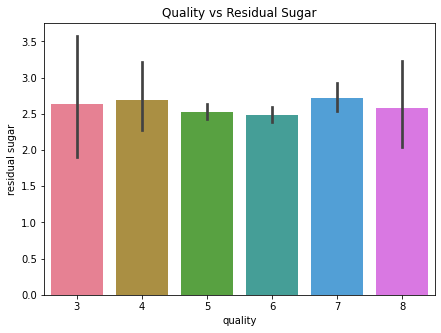

In [12]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Residual Sugar")
sns.barplot(x='quality',y='residual sugar',data=wine,palette='husl')

There is a small Positive correlation between Residual SUgar and Quality which means it doesn't affect the quality much

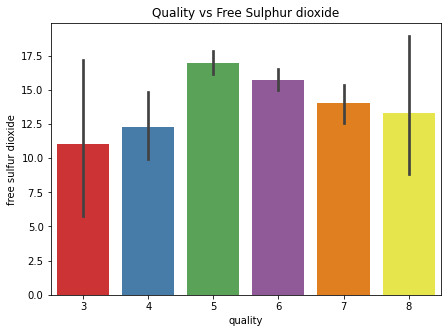

In [13]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Free Sulphur dioxide")
sns.barplot(x='quality',y='free sulfur dioxide',data=wine,palette='Set1')

SMALL NEGATIVE CORRELATION

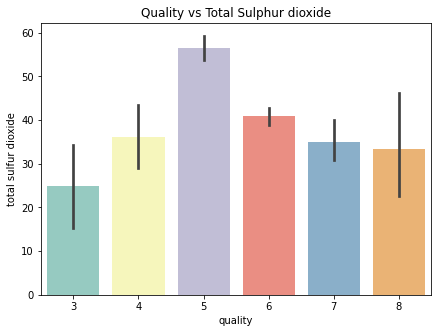

In [14]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Total Sulphur dioxide")
sns.barplot(x='quality',y='total sulfur dioxide',data=wine,palette='Set3')

QUALITY DECREASES with INCREASE in TOTAL SULFUR DIOXIDE

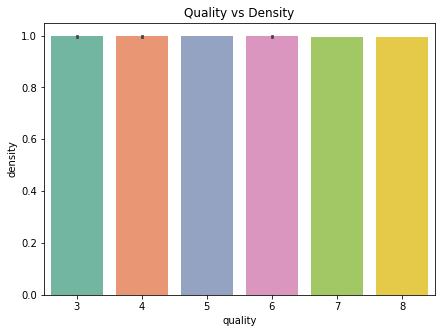

In [15]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Density")
sns.barplot(x='quality',y='density',data=wine,palette='Set2')

SMALL DECREASE in QUALITY with INCREASE in DENSITY

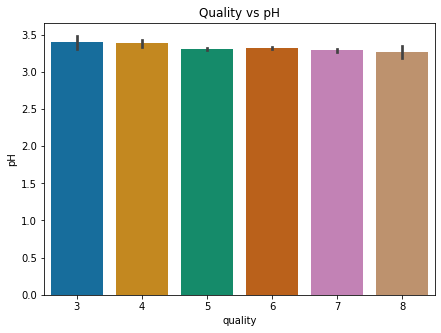

In [16]:
plt.figure(figsize=(7,5))
plt.title("Quality vs pH")
sns.barplot(x='quality',y='pH',data=wine,palette='colorblind')

SMALL NEGATIVE CORRELATION BETWEEN pH and Quality. Doesn't seem to affect much!

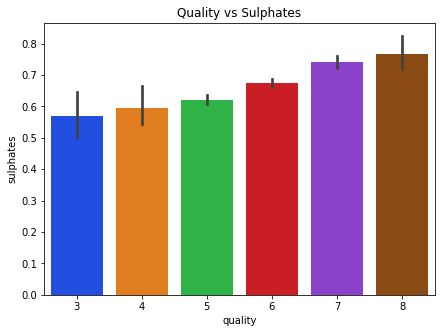

In [17]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Sulphates")
sns.barplot(x='quality',y='sulphates',data=wine,palette='bright')

QUALITY INCREASES with INCREASE in SULPHATES

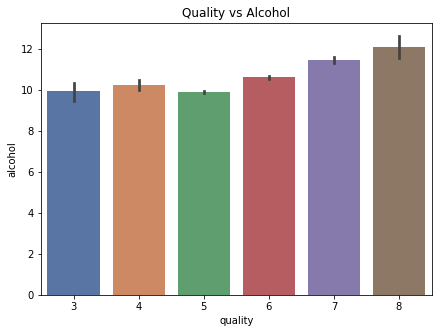

In [18]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Alcohol")
sns.barplot(x='quality',y='alcohol',data=wine,palette='deep')

QUALITY INCREASES with INCREASE of ALCOHOL

## Plotting and calculating Skewness

In [19]:
print("Skewness and Kurtosis of all the columns")
print("++++++++++++++++++++++++++++++++++++++++++")
for col in list(wine.columns):
    print("{0} - Skewness : {1:.3f} and Kurtosis : {2:.3f}".format(col,wine[col].skew(),wine[col].kurt()))
    print("-----------------------------------------------")

Skewness and Kurtosis of all the columns
++++++++++++++++++++++++++++++++++++++++++
fixed acidity - Skewness : 0.983 and Kurtosis : 1.132
-----------------------------------------------
volatile acidity - Skewness : 0.672 and Kurtosis : 1.226
-----------------------------------------------
citric acid - Skewness : 0.318 and Kurtosis : -0.789
-----------------------------------------------
residual sugar - Skewness : 4.541 and Kurtosis : 28.618
-----------------------------------------------
chlorides - Skewness : 5.680 and Kurtosis : 41.716
-----------------------------------------------
free sulfur dioxide - Skewness : 1.251 and Kurtosis : 2.024
-----------------------------------------------
total sulfur dioxide - Skewness : 1.516 and Kurtosis : 3.810
-----------------------------------------------
density - Skewness : 0.071 and Kurtosis : 0.934
-----------------------------------------------
pH - Skewness : 0.194 and Kurtosis : 0.807
-----------------------------------------------
s

Text(0, 0.5, 'Count')

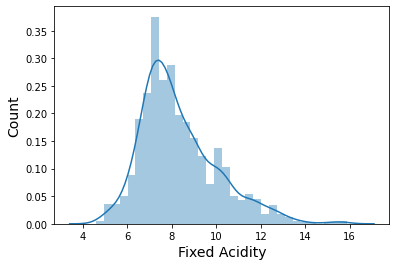

In [20]:
ax = sns.distplot(wine['fixed acidity'])
ax.set_xlabel('Fixed Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

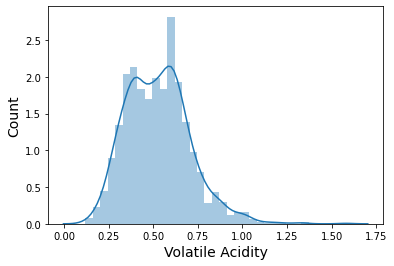

In [21]:
ax = sns.distplot(wine['volatile acidity'])
ax.set_xlabel('Volatile Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

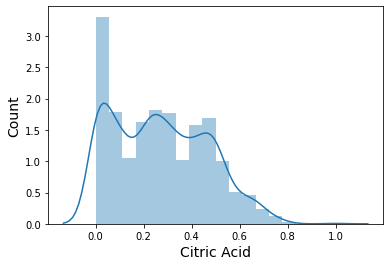

In [22]:
ax = sns.distplot(wine['citric acid'])
ax.set_xlabel('Citric Acid',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

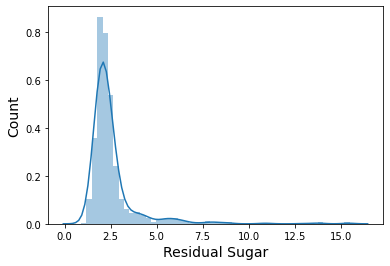

In [23]:
ax = sns.distplot(wine['residual sugar'])
ax.set_xlabel('Residual Sugar',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

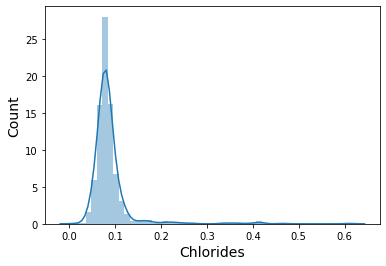

In [24]:
ax = sns.distplot(wine['chlorides'])
ax.set_xlabel('Chlorides',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

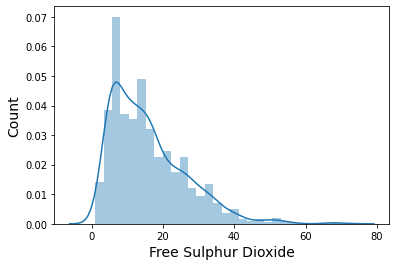

In [25]:
ax = sns.distplot(wine['free sulfur dioxide'])
ax.set_xlabel('Free Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

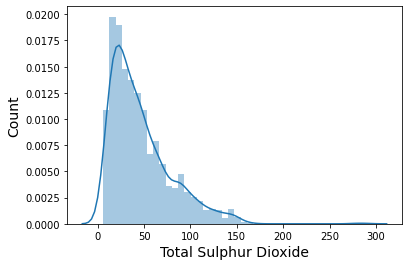

In [26]:
ax = sns.distplot(wine['total sulfur dioxide'])
ax.set_xlabel('Total Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

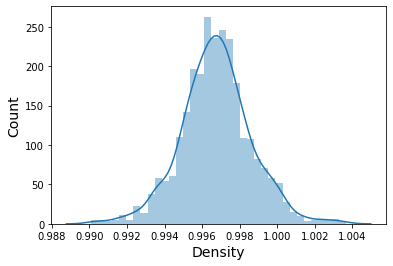

In [27]:
ax = sns.distplot(wine['density'])
ax.set_xlabel('Density',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

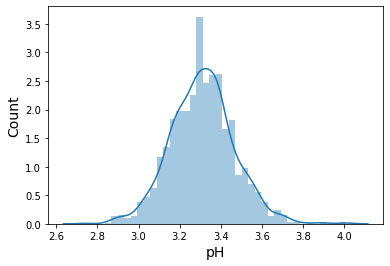

In [28]:
ax = sns.distplot(wine['pH'])
ax.set_xlabel('pH',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

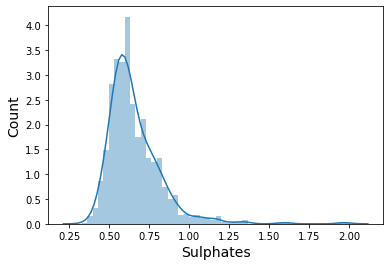

In [29]:
ax = sns.distplot(wine['sulphates'])
ax.set_xlabel('Sulphates',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

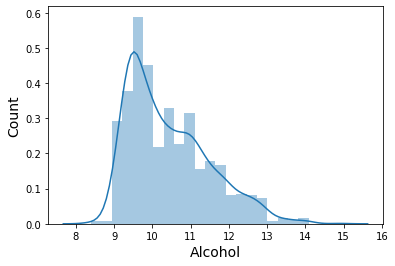

In [30]:
ax = sns.distplot(wine['alcohol'])
ax.set_xlabel('Alcohol',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

## Note - Skewness is caused by Outliers present in the dataset. So by removing outliers we remove the SKewness also

## Removing Skewness by calculating IQR value (Interquartile Range)

In [31]:
wineCopy = wine
#wineCopy.drop(['quality'],axis=1,inplace=True)

In [32]:
from scipy import stats

q1 = wineCopy.quantile(0.25)
q3 = wineCopy.quantile(0.75)
iqr = q3 - q1

Q1 = q1
Q3 = q3
IQR = iqr

print(iqr)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [33]:
print(wineCopy < (11 - 1.5 * iqr)) or (wineCopy > (q3 + 1.5 * iqr))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              True              True         True            True       True   
1              True              True         True            True       True   
2              True              True         True            True       True   
3             False              True         True            True       True   
4              True              True         True            True       True   
...             ...               ...          ...             ...        ...   
1594           True              True         True            True       True   
1595           True              True         True            True       True   
1596           True              True         True            True       True   
1597           True              True         True            True       True   
1598           True              True         True            True       True   

      free sulfur dioxide  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
wineCopy = wineCopy[~((wineCopy < (Q1 - 1.5 * IQR)) |(wineCopy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
wineCopy.shape

(1179, 12)

In [36]:
print("Skewness and Kurtosis of all the columns after Removing Outliers")
print("++++++++++++++++++++++++++++++++++++++++++")
for col in list(wineCopy.columns):
    print("{0} - Skewness : {1:.3f} and Kurtosis : {2:.3f}".format(col,wineCopy[col].skew(),wineCopy[col].kurt()))
    print("-----------------------------------------------")

Skewness and Kurtosis of all the columns after Removing Outliers
++++++++++++++++++++++++++++++++++++++++++
fixed acidity - Skewness : 0.738 and Kurtosis : 0.063
-----------------------------------------------
volatile acidity - Skewness : 0.270 and Kurtosis : -0.237
-----------------------------------------------
citric acid - Skewness : 0.312 and Kurtosis : -0.907
-----------------------------------------------
residual sugar - Skewness : 0.610 and Kurtosis : 0.399
-----------------------------------------------
chlorides - Skewness : 0.222 and Kurtosis : 0.185
-----------------------------------------------
free sulfur dioxide - Skewness : 0.832 and Kurtosis : 0.055
-----------------------------------------------
total sulfur dioxide - Skewness : 0.980 and Kurtosis : 0.329
-----------------------------------------------
density - Skewness : 0.052 and Kurtosis : -0.025
-----------------------------------------------
pH - Skewness : 0.061 and Kurtosis : -0.203
------------------------

Now we see that Skewness has reduced a lot compared to previous values of Skewness of each Column. Now we can proceed with Training our model for prediction of Quality. Outliers may tamper our model's prediction as they are values which have been miscalculated or values which have been recorded wrong

## Plotting Graphs to Compare Skewness

Text(0, 0.5, 'Count')

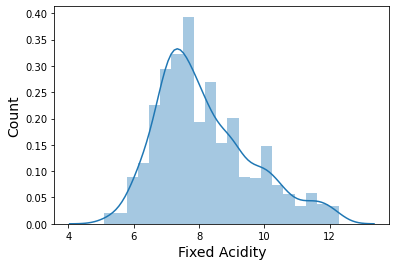

In [37]:
ax = sns.distplot(wineCopy['fixed acidity'])
ax.set_xlabel('Fixed Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

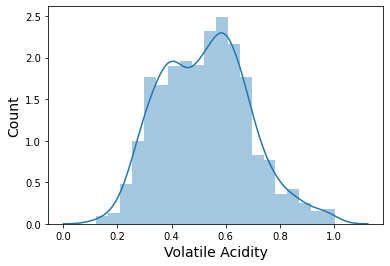

In [38]:
ax = sns.distplot(wineCopy['volatile acidity'])
ax.set_xlabel('Volatile Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

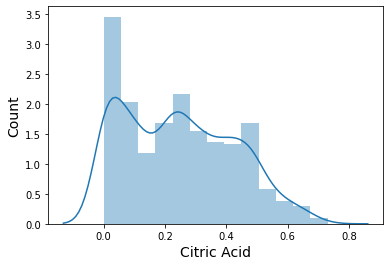

In [39]:
ax = sns.distplot(wineCopy['citric acid'])
ax.set_xlabel('Citric Acid',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

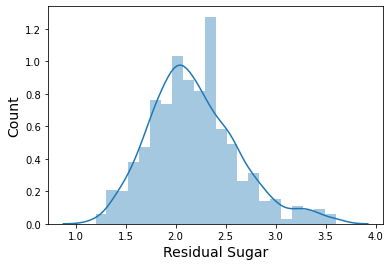

In [40]:
ax = sns.distplot(wineCopy['residual sugar'])
ax.set_xlabel('Residual Sugar',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

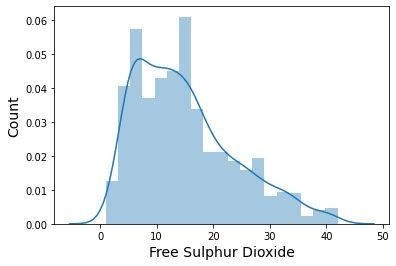

In [41]:
ax = sns.distplot(wineCopy['free sulfur dioxide'])
ax.set_xlabel('Free Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

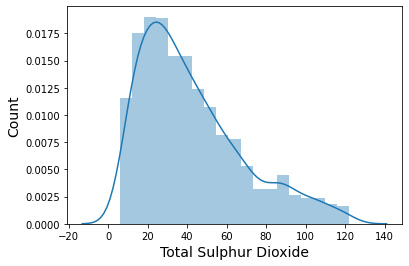

In [42]:
ax = sns.distplot(wineCopy['total sulfur dioxide'])
ax.set_xlabel('Total Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

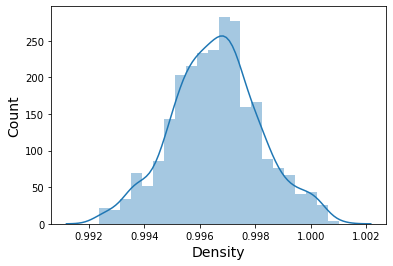

In [43]:
ax = sns.distplot(wineCopy['density'])
ax.set_xlabel('Density',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

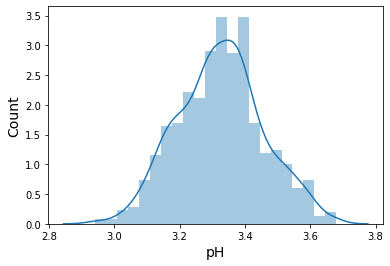

In [44]:
ax = sns.distplot(wineCopy['pH'])
ax.set_xlabel('pH',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

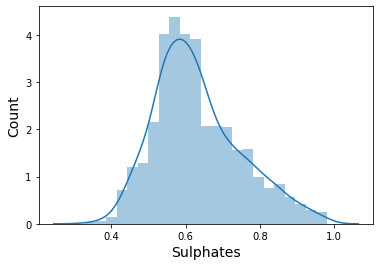

In [45]:
ax = sns.distplot(wineCopy['sulphates'])
ax.set_xlabel('Sulphates',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

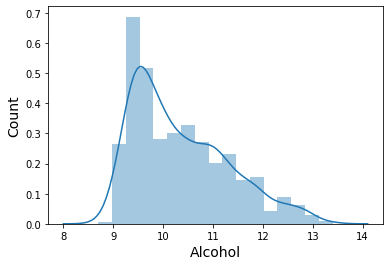

In [46]:
ax = sns.distplot(wineCopy['alcohol'])
ax.set_xlabel('Alcohol',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Now you can compare each graphs after removing outliers to that which had outliers. A great difference we see. No Positive or Negative skewness is observed. Now we are sure that skewness has reduced a lot. Hence we can start training of out data

In [47]:
#wine = pd.read_csv('./winequality-red.csv')
wineCopy['quality'].value_counts()

5    513
6    498
7    135
4     33
Name: quality, dtype: int64

## After Removing Outliers we see that Alcohol of Quality 3 and 9 are gone. So since the dataset is very small, we will proceed without removing Outliers

## Preparing Dataset for Training

In [48]:
#FOR DIVIDING QUALITY IN 2 CLASS - 0 and 1

bins = (2, 6.5, 8)
labels = ['bad', 'good']
wine['quality'] = pd.cut(x = wine['quality'], bins = bins, labels = labels)

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
wine['quality'] = labelencoder_y.fit_transform(wine['quality'])

wine.head()

wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [49]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

StratifiedShuffleSplit is used to maintain the correct ratio of value counts while splitting the data for Train and Test. Assume we have 10 'Ones' and 6 'Zeros'. If we randomly split, it may happen that Train set will have 8 'Ones' and 2 'Zeros'. If this happends, out model will be biased towards 'Ones'. Hence the above mentioned method is used to make sure that our model is not bias

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index, test_index in split.split(wine,wine['quality']):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

strat_test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
434,10.4,0.410,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,0
213,8.2,0.570,0.26,2.2,0.060,28.0,65.0,0.99590,3.30,0.43,10.1,0
1447,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,0
231,8.0,0.380,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,0
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,0


In [51]:
wine.shape

(1599, 12)

In [52]:
print("Test size : {0}, Train size : {1}".format(strat_train_set.shape,strat_test_set.shape))

Test size : (1279, 12), Train size : (320, 12)


In [53]:
X_train_set = strat_train_set.drop('quality',axis=1).values
y_train_set = strat_train_set['quality'].values.reshape(-1,1)

X_test_set = strat_test_set.drop('quality',axis=1).values
y_test_set = strat_test_set['quality'].values.reshape(-1,1)

In [54]:
print("Size of X_train : {0}, y_train : {1}".format(X_train_set.shape, y_train_set.shape))
print("Size of X_test : {0}, y_test : {1}".format(X_test_set.shape, y_test_set.shape))

Size of X_train : (1279, 11), y_train : (1279, 1)
Size of X_test : (320, 11), y_test : (320, 1)


In [55]:
def countValue(data):
    zero = 0
    one = 0
    for i in data:
        if(i==0):
            zero +=1
        else:
            one +=1
    s = "Zeros : "+str(zero)+" Ones : "+str(one)
    return s

In [56]:
print("In Train Set \'quality\' : "+countValue(y_train_set))
print("In Test Set \'quality\' : "+countValue(y_test_set))

In Train Set 'quality' : Zeros : 1105 Ones : 174
In Test Set 'quality' : Zeros : 277 Ones : 43


## TRAINING VARIOUS ALGORITHMS

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Linear Regression

In [58]:
logisticRegModel = LogisticRegression(C=1, fit_intercept=True, max_iter=1000,penalty='l2',solver='liblinear')
logisticRegModel.fit(X_train_set,y_train_set.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred_logistic = logisticRegModel.predict(X_test_set)
accuracy_lr_train = accuracy_score(y_test_set,y_pred_logistic)
print("Accuracy on Test Set : ",accuracy_lr_train)

Accuracy on Test Set :  0.875


In [60]:
print('Confusion Matrix')
confusion_matrix(y_test_set,y_pred_logistic)

Confusion Matrix


array([[271,   6],
       [ 34,   9]])

Performing Hyperparameter Tuning

In [61]:
dual=[True,False]
max_iter=[100,200,500,800,1000,1200]
solver = ['lbfgs', 'liblinear']
penalty = ['l1', 'l2']
param_grid = dict(dual=dual,max_iter=max_iter,solver=solver,penalty=penalty)

In [62]:
logisticRegRSCV = RandomizedSearchCV(logisticRegModel,param_grid, random_state=42, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [63]:
logisticRegRSCV.fit(X_train_set,y_train_set)

/home/sahil/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:277: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/sahil/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'dual': [True, False],
                                        'max_iter': [100, 200, 500, 800, 1000,
                                                     1200],
                                        'penalty': ['l1', 'l2'],
           

In [64]:
logisticRegRSCV.best_score_

0.8772514763779528

In [65]:
logisticRegRSCV.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'dual': False}

Now we got the best parameters for our model! Now We will again create our model

In [66]:
logisticRegModel_tuned = LogisticRegression(solver= 'liblinear', penalty='l1',max_iter= 100, dual= False)
logisticRegModel_tuned.fit(X_train_set,y_train_set)

/home/sahil/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred_logistic_tuned = logisticRegModel_tuned.predict(X_test_set)
accuracy_lr_train_tuned = accuracy_score(y_test_set,y_pred_logistic_tuned)
print("Accuracy after Hyperparameter Tuning : "+str(accuracy_lr_train_tuned))
print("Confusion Matrix :")
confusion_matrix(y_test_set,y_pred_logistic_tuned)

Accuracy after Hyperparameter Tuning : 0.884375
Confusion Matrix :


array([[270,   7],
       [ 30,  13]])

So, the accuracy of Logistic Regression model Increased from 87.5% to 88.4%

## K-Nearest Neighbours

In [68]:
knnModel = KNeighborsClassifier(leaf_size=1, metric='minkowski', metric_params=None,n_jobs=None,n_neighbors=32, p=2,weights='distance')
knnModel.fit(X_train_set,y_train_set)

<ipython-input-68-d98dff970456>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnModel.fit(X_train_set,y_train_set)


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='distance')

In [69]:
y_pred_knn = knnModel.predict(X_test_set)
accuracy_knn_train = accuracy_score(y_test_set,y_pred_knn)
print("Accuracy of KNN Classifer is : "+str(accuracy_knn_train))
print("Confusion Matrix")
confusion_matrix(y_test_set,y_pred_knn)

Accuracy of KNN Classifer is : 0.896875
Confusion Matrix


array([[275,   2],
       [ 31,  12]])

In [70]:
params = {'n_neighbors':[5,15,20,25,30,25,40,45,50],
          'leaf_size':[1,2,3,4,5,8,10],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
knnModelRSCV = RandomizedSearchCV(knnModel,params,n_jobs=-1,cv=10,n_iter=100,random_state=42)
knnModelRSCV.fit(X_train_set,y_train_set)

/home/sahil/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto', leaf_size=1,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=32,
                                                  p=2, weights='distance'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 8, 10],
                                        'n_jobs': [-1],
                                        'n_neighbors': [5, 15, 20, 25, 30, 25,
                                                        40, 45, 50],
                                        'weights': ['uniform', 'distance']},
             

In [71]:
knnModelRSCV.best_score_

0.9007012795275591

In [72]:
knnModelRSCV.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='distance')

In [73]:
knnModel_tuned = KNeighborsClassifier(algorithm='brute', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='distance')
knnModel_tuned.fit(X_train_set,y_train_set)

<ipython-input-73-33df6264d579>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnModel_tuned.fit(X_train_set,y_train_set)


KNeighborsClassifier(algorithm='brute', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='distance')

In [74]:
y_pred_knn_tuned = knnModel_tuned.predict(X_test_set)
accuracy_knn_train_tuned = accuracy_score(y_test_set,y_pred_knn_tuned)
print("Accuracy of KNN after Hyperparameter Tuning : "+str(accuracy_knn_train_tuned))
print("Confusion Matrix")
confusion_matrix(y_test_set,y_pred_knn_tuned)

Accuracy of KNN after Hyperparameter Tuning : 0.896875
Confusion Matrix


array([[273,   4],
       [ 29,  14]])

After Hyperparameter Tuning no Difference is seen in Accuracy. Hence it stays 89.68%